# Orlando - Classificação Multiclasse - Iris simples

Formato dos dados:
X_treinamento: (112, 4)
X_teste: (38, 4)
y_treinamento: (112, 3)
y_teste: (38, 3)


c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55 (220.00 B)

 Trainable params: 55 (220.00 B)

 Non-trainable params: 0 (0.00 B)

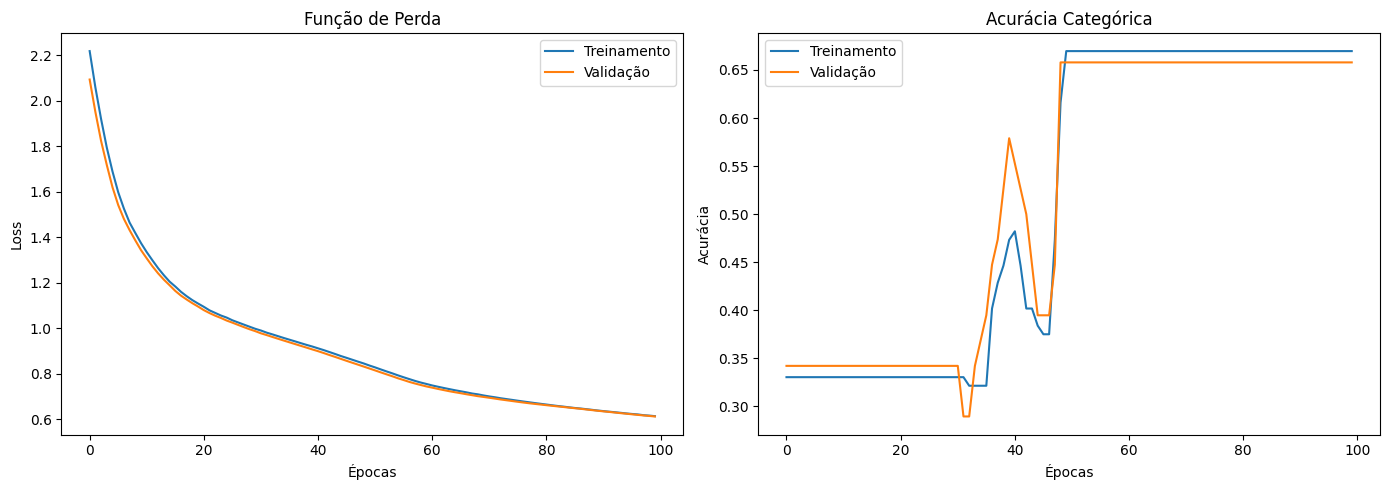


 Acurácia final no teste: 0.6579
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

Acurácia (sklearn): 0.6578947368421053


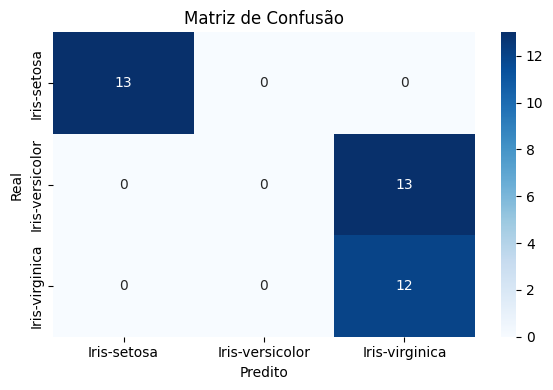


 Relatório de Classificação:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.00      0.00      0.00        13
 Iris-virginica       0.48      1.00      0.65        12

       accuracy                           0.66        38
      macro avg       0.49      0.67      0.55        38
   weighted avg       0.49      0.66      0.55        38



c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [2]:
# -----------------------------
# 1. Importação das bibliotecas
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# -----------------------------
# 2. Carregamento e preparação dos dados
# -----------------------------
# Base Íris: 150 amostras, 4 características, 3 classes (Setosa, Versicolor, Virginica)
base = pd.read_csv(r"C:\Users\CLIENTE\OneDrive\PROJETOS\PROJETO_DEEP_LEARNING\Parte 1 - Redes Neurais Artificiais\classificação mais classes\iris.csv")

# Separação de atributos (X) e classe (y)
X = base.iloc[:, 0:4].values
y = base.iloc[:, 4].values

# Codificação da variável de saída (de string para inteiros)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Setosa=0, Versicolor=1, Virginica=2

# One-hot encoding para uso com softmax (saída multiclasses)
y = to_categorical(y)

# -----------------------------
# 3. Divisão treino e teste
# -----------------------------
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Formato dos dados:")
print("X_treinamento:", X_treinamento.shape)
print("X_teste:", X_teste.shape)
print("y_treinamento:", y_treinamento.shape)
print("y_teste:", y_teste.shape)

# -----------------------------
# 4. Construção da rede neural
# -----------------------------
# Heurística: (n_features + n_classes) / 2 = (4 + 3) / 2 = 3.5 ≈ 4 neurônios por camada

rede_neural = Sequential([
    InputLayer(input_shape=(4,)),
    Dense(units=4, activation='relu'),
    Dense(units=4, activation='relu'),
    Dense(units=3, activation='softmax')  # Softmax para classificação multiclasse
])

rede_neural.summary()

# -----------------------------
# 5. Compilação e treinamento
# -----------------------------
rede_neural.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['categorical_accuracy'])

historico = rede_neural.fit(X_treinamento, y_treinamento,
                            batch_size=10,
                            epochs=100,
                            validation_data=(X_teste, y_teste),
                            verbose=0)

# -----------------------------
# 6. Avaliação visual do aprendizado
# -----------------------------
plt.figure(figsize=(14, 5))

# Perda (Loss)
plt.subplot(1, 2, 1)
plt.plot(historico.history['loss'], label='Treinamento')
plt.plot(historico.history['val_loss'], label='Validação')
plt.title('Função de Perda')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# Acurácia
plt.subplot(1, 2, 2)
plt.plot(historico.history['categorical_accuracy'], label='Treinamento')
plt.plot(historico.history['val_categorical_accuracy'], label='Validação')
plt.title('Acurácia Categórica')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()

# -----------------------------
# 7. Avaliação final com métricas
# -----------------------------
# Avaliação quantitativa
loss, accuracy = rede_neural.evaluate(X_teste, y_teste, verbose=0)
print(f"\n Acurácia final no teste: {accuracy:.4f}")

# Previsões
previsoes = rede_neural.predict(X_teste)
previsoes_classes = np.argmax(previsoes, axis=1)
y_teste_classes = np.argmax(y_teste, axis=1)

# Acurácia com sklearn
print("\nAcurácia (sklearn):", accuracy_score(y_teste_classes, previsoes_classes))

# -----------------------------
# 8. Matriz de confusão
# -----------------------------
cm = confusion_matrix(y_teste_classes, previsoes_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.tight_layout()
plt.show()

# -----------------------------
# 9. Relatório de classificação
# -----------------------------
print("\n Relatório de Classificação:")
print(classification_report(y_teste_classes, previsoes_classes, target_names=label_encoder.classes_))


### Considerações:

A análise dos resultados obtidos com a rede neural treinada sobre a base de dados Íris revela um cenário de desempenho misto, com bons indícios de aprendizado, porém com sérias deficiências na generalização entre as classes. Inicialmente, observa-se nas curvas de perda (loss) que o modelo apresenta uma trajetória decrescente tanto no conjunto de treino quanto no de validação, o que indica que o processo de otimização está funcionando corretamente em termos de minimização do erro. Não há divergência significativa entre as curvas, o que sugere ausência de overfitting. Entretanto, quando se observa a curva de acurácia categórica, nota-se uma baixa performance nas primeiras 50 épocas, seguida de uma elevação abrupta e estabilização, que indica que o modelo possivelmente encontrou uma solução viável, mas apenas para uma parte restrita do problema.

A acurácia final obtida no conjunto de teste foi de aproximadamente 65,79%, valor relativamente modesto considerando a natureza bem definida da base de dados Íris. Esta base, clássica em tarefas de classificação multiclasse, possui separabilidade clara entre as espécies, especialmente entre Iris-setosa e as demais. A análise da matriz de confusão confirma isso: o modelo classifica corretamente todos os exemplos de Iris-setosa (13/13), mas falha completamente em identificar a classe Iris-versicolor, atribuindo todos os seus exemplos à classe Iris-virginica. Já a classe Iris-virginica é parcialmente reconhecida, com 12 de 12 exemplos corretamente classificados. Esse comportamento sugere que o modelo aprendeu a separar bem apenas duas das três classes, confundindo completamente duas delas.

O relatório de classificação aprofunda essa observação. A classe Iris-setosa apresenta valores perfeitos de precisão, revocação e F1-score (todos igual a 1.00), o que reforça sua separabilidade natural. Por outro lado, a classe Iris-versicolor apresenta valores nulos nessas métricas, refletindo sua completa ausência de reconhecimento. A classe Iris-virginica, embora com recall perfeito (1.00), apresenta precisão de apenas 0.48, evidenciando que o modelo está atribuindo exemplos indevidamente a ela — precisamente os da classe versicolor. A média ponderada (weighted average) do F1-score é de 0.55, indicando um desempenho geral abaixo do esperado para um problema canônico e relativamente simples.

Em termos de possíveis causas, esse resultado pode decorrer de múltiplos fatores. A arquitetura da rede neural utilizada, composta por duas camadas ocultas com quatro neurônios e função de ativação ReLU, pode ser subdimensionada para capturar as nuances entre versicolor e virginica, que são as classes mais semelhantes. Além disso, a quantidade de épocas (100) pode não ter sido suficiente para permitir a convergência completa do modelo, considerando que a acurácia só estabiliza após a metade do treinamento. Fatores adicionais como a ausência de normalização dos dados, ajuste de taxa de aprendizado ou estratégias de regularização também podem estar limitando o desempenho.

Portanto, conclui-se que o modelo apresenta sinais de aprendizado promissores, mas requer melhorias estruturais e de pré-processamento para atingir níveis satisfatórios de acurácia em todas as classes. Recomenda-se, como próximos passos, a introdução de normalização das variáveis de entrada, o uso de arquiteturas com mais unidades ocultas ou regularização com Dropout, bem como a realização de validação cruzada e ajuste de hiperparâmetros. Tais ações podem não apenas melhorar a acurácia global, mas sobretudo garantir a capacidade discriminativa entre classes com maior sobreposição, como ocorre entre versicolor e virginica.